In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("socialmobility.csv")
data["n"] = data["count"]
data.drop(["count"], axis=1, inplace=True)
data

,father,son,n
0,farm,farm,703
1,farm,unskilled,1478
2,farm,skilled,1430
3,farm,professional,1109
4,unskilled,farm,58
5,unskilled,unskilled,1756
6,unskilled,skilled,1630
7,unskilled,professional,1568
8,skilled,farm,63
9,skilled,unskilled,1453


In [3]:
# resample data for bootstrapped confidence intervals
n_boots = 1000
counts = data.n.values
resampler = stats.multinomial(counts.sum(), counts/counts.sum())
resampled_counts = resampler.rvs(n_boots)

In [4]:
# select unskilled fathers
mask = data.father == "unskilled"
relevant = np.tile(mask, [1, n_boots]).reshape(n_boots, -1)
relevant_counts = resampled_counts[relevant].reshape([n_boots, -1])

# get resampled distributions of son profession
prob_samples = relevant_counts / relevant_counts.sum(axis=1).reshape(-1, 1)
prob_samples

array([[0.01269394, 0.34938545, 0.32742293, 0.31049768],
       [0.01472368, 0.34731747, 0.33037515, 0.3075837 ],
       [0.00994924, 0.35898477, 0.33055838, 0.30050761],
       ...,
       [0.01081731, 0.35476763, 0.32111378, 0.31330128],
       [0.0108451 , 0.3580929 , 0.33271946, 0.29834254],
       [0.01021839, 0.35303546, 0.32758966, 0.30915648]])

In [5]:
results = pd.DataFrame()
results["son_job"] = data[mask].son.values
results["p (MAP)"] = prob_samples.mean(axis=0)
results[["p (2.5% bound)", "p (97.5% bound)"]] = np.percentile(prob_samples, [2.5, 97.5], axis=0).T
results

,son_job,p (MAP),p (2.5% bound),p (97.5% bound)
0,farm,0.011604,0.008849,0.014792
1,unskilled,0.350089,0.337379,0.363108
2,skilled,0.325521,0.312949,0.338438
3,professional,0.312786,0.299182,0.325085


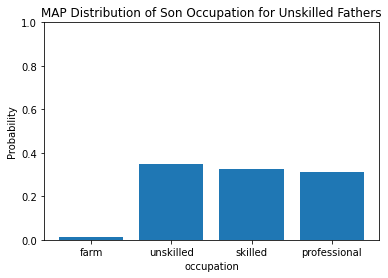

In [6]:
pos = np.arange(len(results))
plt.bar(pos, results["p (MAP)"])
plt.ylim(0, 1)
plt.xticks(pos, results.son_job)
plt.title("MAP Distribution of Son Occupation for Unskilled Fathers")
plt.ylabel("Probability")
plt.xlabel("occupation")
plt.show()

In [7]:
# select unskilled fathers
mask = data.son == "professional"
relevant = np.tile(mask, [1, n_boots]).reshape(n_boots, -1)
relevant_counts = resampled_counts[relevant].reshape([n_boots, -1])

# get resampled distributions of son profession
prob_samples = relevant_counts / relevant_counts.sum(axis=1).reshape(-1, 1)
prob_samples

array([[0.13083129, 0.1801707 , 0.29603648, 0.39296153],
       [0.13091988, 0.1810089 , 0.29792285, 0.39014837],
       [0.13070885, 0.17602284, 0.29911989, 0.39414843],
       ...,
       [0.13552897, 0.1852861 , 0.28953915, 0.38964578],
       [0.13161984, 0.17429767, 0.30029886, 0.39378362],
       [0.13030088, 0.18277659, 0.28559583, 0.4013267 ]])

In [8]:
results = pd.DataFrame()
results["father_job"] = data[mask].father.values
results["p (MAP)"] = prob_samples.mean(axis=0)
results[["p (2.5% bound)", "p (97.5% bound)"]] = np.percentile(prob_samples, [2.5, 97.5], axis=0).T
results

,father_job,p (MAP),p (2.5% bound),p (97.5% bound)
0,farm,0.130844,0.123339,0.138080
1,unskilled,0.184955,0.176338,0.192856
2,skilled,0.293401,0.283906,0.303437
3,professional,0.390800,0.380383,0.401785


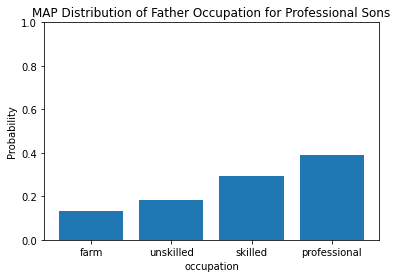

In [9]:
pos = np.arange(len(results))
plt.bar(pos, results["p (MAP)"])
plt.ylim(0, 1)
plt.xticks(pos, results.father_job)
plt.title("MAP Distribution of Father Occupation for Professional Sons")
plt.ylabel("Probability")
plt.xlabel("occupation")
plt.show()